## All data Model

In [648]:
from SALib.analyze import sobol
from SALib.sample import saltelli
import numpy as np
import numpy.linalg as linalg
import pandas
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
from read_csv import *

## Parameters

In [649]:
#Birds
mu_b = 0.007 #natality and mortality rate without infectious conditions for birds
beta_vb = 0.3 #probability to be infected by mosquitoes
gamma_b = 1/8 #cure rate (in days^(-1))
delta_b = 0.045 #mortality rate due to infection

#Mosquitoes
mu_v = 1/4 #natality and mortality rate without infectious conditions for mosquitoes
beta_bv = 0.4 #probability to be infected by birds
beta_hv = 0.4 #probability to be infected by humans

#Humans
mu_h = 1/25000 #natality and mortality rate without infectious conditions for hhumans
beta_vh = 0.01 #probability to be infected by mosquitoes
q = 0.02 #probability to be hospitalized
gamma_h = 1/7 #cure rate (in days^(-1))
delta_h = 0.000000001 #mortality rate due to infection
rho_h = 0.011 #cure rate if hospitalized

param = (mu_b,beta_vb,gamma_b,delta_b,mu_v,beta_bv,beta_hv,mu_h,beta_vh,q,gamma_h,delta_h,rho_h)

## Model

In [650]:
def model_class(Y,t,mu_b,beta_vb,gamma_b,delta_b,mu_v,beta_bv,beta_hv,mu_h,beta_vh,q,gamma_h,delta_h,rho_h):
    
    S_b, I_b, R_b, D_b, S_m1, I_m1, S_m2, I_m2, S_h1, I_h1, R_h1, H_h1, D_h1, S_h2, I_h2, R_h2, H_h2, D_h2, S_h3, I_h3, R_h3, H_h3, D_h3 = Y
    
    N_b = S_b+I_b+R_b
    N_m1 = S_m1+I_m1
    N_m2 = S_m2+I_m2
    
    N_m = N_m1+N_m2
    
    N_h1 = S_h1+I_h1+R_h1
    N_h2 = S_h2+I_h2+R_h2
    N_h3 = S_h3+I_h3+R_h2
    
    N_h = N_h1+N_h2+N_h3
    
    dS_b = mu_b*N_b - beta_vb*(I_m1+I_m2)*S_b/N_b - mu_b*S_b
    dI_b = (beta_vb*(I_m1+I_m2)*S_b/N_b - (mu_b+gamma_b+delta_b)*I_b)*3.5
    dR_b = gamma_b*I_b - mu_b*R_b
    dD_b = delta_b*I_b
    
    dS_m1 = mu_v*N_m1 - (mu_v+beta_bv*I_b/N_b + beta_hv*((I_h1+I_h2)/(N_h1+N_h2)))*S_m1
    dI_m1 = (beta_bv*I_b/N_b + beta_hv*((I_h1+I_h2)/(N_h1+N_h2)))*S_m1 - mu_v*I_m1
    
    dS_m2 = mu_v*N_m2 - (mu_v+beta_bv*I_b/N_b + beta_hv*((I_h3+I_h2)/(N_h3+N_h2)))*S_m2
    dI_m2 = (beta_bv*I_b/N_b + beta_hv*((I_h3+I_h2)/(N_h3+N_h2)))*S_m1 - mu_v*I_m2
    
    dS_h1 = mu_h*N_h1 - (mu_h+beta_vh*I_m1/N_h1)*S_h1
    dI_h1 = beta_vh*(I_m1/N_h1)*S_h1 - (mu_h+gamma_h+delta_h)*I_h1
    dH_h1 = q*I_h1 - rho_h*H_h1
    dR_h1 = gamma_h*I_h1 - mu_h*R_h1 + rho_h*H_h1
    dD_h1 = delta_h*I_h1
    
    dS_h2 = mu_h*N_h2 - (mu_h+beta_vh*((I_m1+I_m2)/N_h2))*S_h2
    dI_h2 = beta_vh*((I_m1+I_m2)/N_h2)*S_h2 - (mu_h+gamma_h+delta_h)*I_h2
    dR_h2 = gamma_h*I_h2 - mu_h*R_h2 + rho_h*H_h2
    dH_h2 = q*I_h2 - rho_h*H_h2 
    dD_h2 = delta_h*I_h2
    
    dS_h3 = mu_h*N_h3 - (mu_h+beta_vh*I_m2/N_h3)*S_h3
    dI_h3 = (beta_vh*(I_m2/N_h3)*S_h3 - (mu_h+gamma_h+delta_h)*I_h3)
    dR_h3 = (gamma_h*I_h3 - mu_h*R_h3 + rho_h*H_h3)*3.5
    dH_h3 = (q*I_h3 - rho_h*H_h3)
    dD_h3 = delta_h*I_h3
    
    return [dS_b,dI_b,dR_b,dD_b,dS_m1,dI_m1,dS_m2,dI_m2,dS_h1,dI_h1,dR_h1,dH_h1,dD_h1,dS_h2,dI_h2,dR_h2,dH_h2,dD_h2,dS_h3,dI_h3,dR_h3,dH_h3,dD_h3]

In [651]:
#Vector at time t=0
Y0 = [34000,500,0,0,
      19200,0,5800,0,
      4500,1,0,0,0,
      3600,0,0,0,0,
      4750,0,0,0,0]

time = np.linspace(0,100,100)

#Solution
sol=integrate.odeint(model_class,Y0,time,args=param)


## Plotting, here the parameters were already selected with fitted parameters

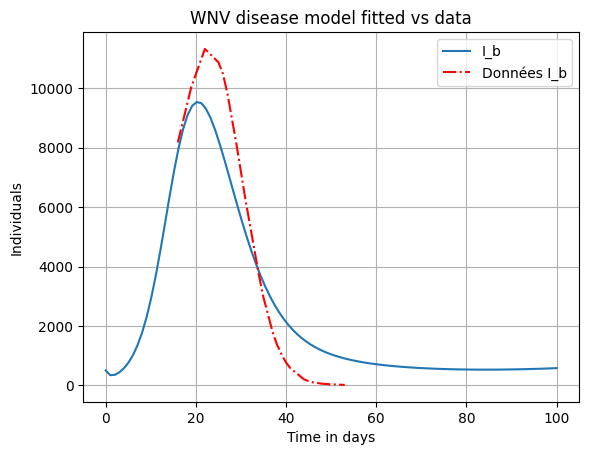

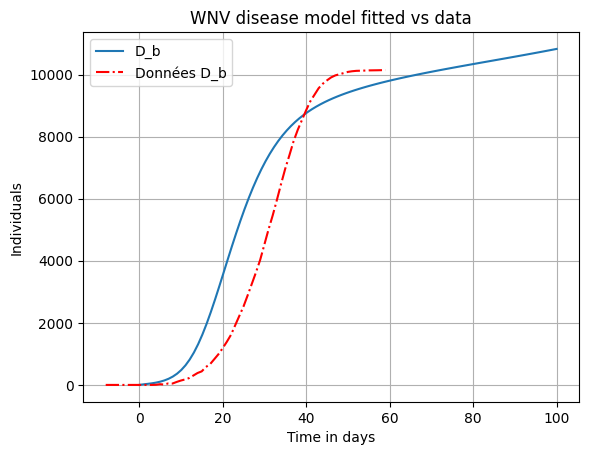

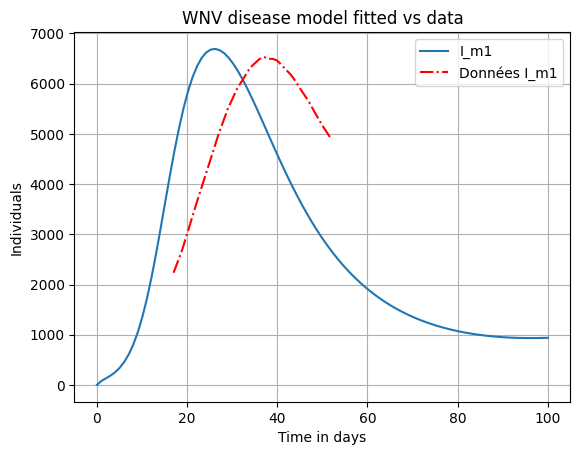

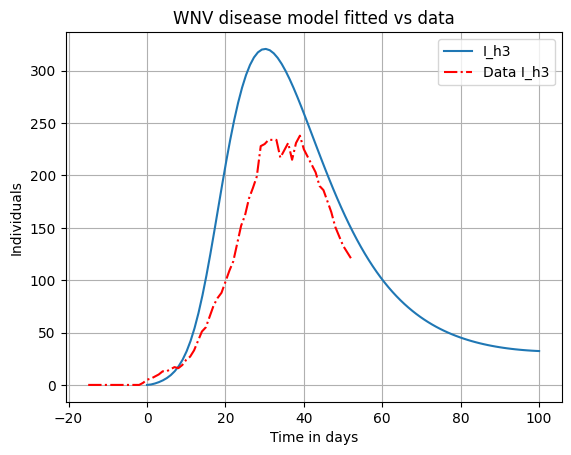

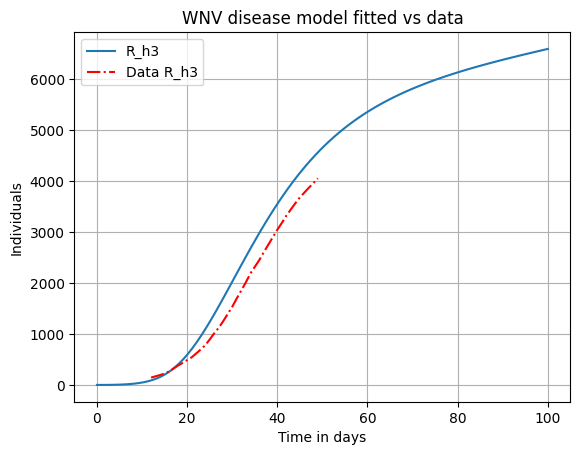

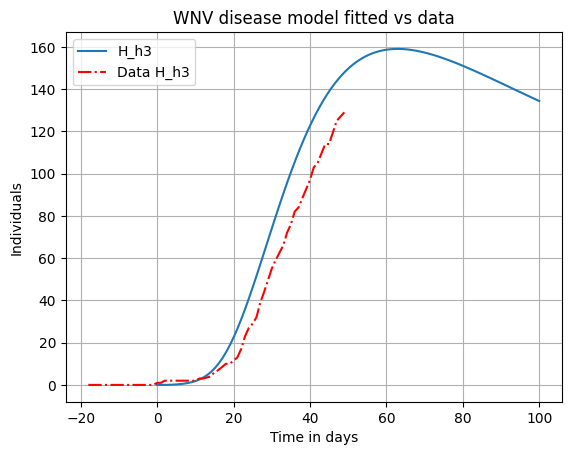

In [652]:
# WNV disease on infected and dead birds' side

time_prime5 = l_b_array()[:,0] - 14

plt.plot(time, sol[:, 1], label='I_b')
plt.plot(time_prime5, l_b_array()[:,1],"r-.", label="Data I_b")

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model fitted vs data")
plt.grid()
plt.show()


time_prime6 = dead_birds_array()[:,0] - 8

plt.plot(time, sol[:, 3], label='D_b')
plt.plot(time_prime6, dead_birds_array()[:,1], "r-.",label="Data D_b")

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model fitted vs data")
plt.grid()
plt.show()
plt.figure()

# WNV disease on infected lake 1 mosquitoes' side

time_prime4 = l_m2_array()[:,0] - 15

plt.plot(time, sol[:, 5], label='I_m1')
plt.plot(time_prime4,l_m1_array()[:,1],"r-.",label="Data I_m1")

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model fitted vs data")
plt.grid()
plt.show()

# WNV disease on zone 3 humans' side

time_prime = l_h3_array()[:,0] - 15

plt.plot(time, sol[:, 19], label='I_h3')
plt.plot(time_prime,l_h3_array()[:,1],"r-.",label="Data I_h3")

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model fitted vs data")
plt.grid()
plt.show()

time_prime2 = r_h3_array()[:,0] - 18

plt.plot(time, sol[:, 20], label='R_h3')
plt.plot(time_prime2,r_h3_array()[:,1],"r-.",label="Data R_h3")

plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model fitted vs data")
plt.grid()
plt.show()

time_prime3 = c_h3_array()[:,0] - 18

plt.plot(time, sol[:, 21], label='H_h3')
plt.plot(time_prime3,c_h3_array()[:,1],"r-.",label="Data H_h3")


plt.legend(loc='best')
plt.xlabel("Time in days")
plt.ylabel("Individuals")
plt.title("WNV disease model fitted vs data")
plt.grid()
plt.show()

## Obtaining fitted parameters using the three slots of data

In [654]:
# Avec data_1 + data_2 + data_3

t = l_h3_array(True)[:,0]

#Fitting on zone 3 humans
def fitting_function_h3(params_to_fit, times, data):
    
    mu_h,beta_hv, gamma_h, delta_h,rho_h= params_to_fit
    
    params = (mu_b,beta_vb,gamma_b,delta_b,mu_v,beta_bv,beta_hv,mu_h,beta_vh,q,gamma_h,delta_h,rho_h)
    
    model_predictions = integrate.odeint(model_class, Y0, times, args=params)
    
    model_pred = np.concatenate((model_predictions[t,20],model_predictions[t,21]))
    
    diff = 0
    for i in range(len(data)):
        if data[i] != None :
            diff += model_pred[i] - data[i]
    
    return (diff)

#Fitting on dead birds
def fitting_function_D_b(params_to_fit, times, data):
    mu_b,beta_vb, gamma_b, delta_b= params_to_fit
    
    params = (mu_b,beta_vb,gamma_b,delta_b,mu_v,beta_bv,beta_hv,mu_h,beta_vh,q,gamma_h,delta_h,rho_h)
    
    model_predictions = integrate.odeint(model_class, Y0, times, args=params)
    
    model_pred = model_predictions[t,3]
    
    diff = 0
    for i in range(len(data)):
        if data[i] != None :
            diff += model_pred[i] - data[i]
    return (diff)
    
#Data we considered
data_I_h3 = l_h3_array(True)[:,1]
data_H_h3 = c_h3_array(True)[:,1]
data_R_h3 = r_h3_array(True)[:,1]
data_h3 = np.concatenate((data_R_h3,data_H_h3))

data_D_b = [dead_birds_array()[i][1] for i in range(len(dead_birds_array()))]



#Intial guesses
initial_guess_I = [mu_h,beta_hv,gamma_h,delta_h,rho_h]
initial_guess_I_b = [mu_b,beta_vb,gamma_b,delta_b]

#Results of fitting
result_h3 = optimize.least_squares(fitting_function_h3, initial_guess_I, args=(time, data_h3))
result_D_b = optimize.least_squares(fitting_function_D_b, initial_guess_I_b, args=(time, data_D_b))


#Fitted parameters
fitted_mu_h_3 = round(result_h3.x[0], 3)
fitted_beta_hv_3 = round(result_h3.x[1], 3)
fitted_gamma_h_3 = round(result_h3.x[2], 3)
fitted_delta_h_3 = round(result_h3.x[3], 3)
fitted_rho_h_3 = round(result_h3.x[4], 3)

fitted_mu_b = round(result_D_b.x[0], 3)
fitted_beta_vb = round(result_D_b.x[1], 3)
fitted_gamma_b = round(result_D_b.x[2], 3)
fitted_delta_b = round(result_D_b.x[3], 3)

#Calculate fitted model to compare
fitting_modele_class_h3 = integrate.odeint(model_class, Y0, time, args= (mu_b, beta_vb, gamma_b,
delta_b, mu_v, 
beta_bv ,
fitted_beta_hv_3 , fitted_mu_h_3 , beta_vh , q,
fitted_gamma_h_3 , 
fitted_delta_h_3 ,
fitted_rho_h_3 ))

fitting_modele_class_D_b = integrate.odeint(model_class, Y0, time, args= (fitted_mu_b, fitted_beta_vb, fitted_gamma_b,
fitted_delta_b, mu_v, 
beta_bv ,
beta_hv, mu_h , beta_vh , q,
gamma_h, 
delta_h ,
rho_h ))

print(fitted_mu_h_3,fitted_beta_hv_3,fitted_gamma_h_3,fitted_delta_h_3,fitted_rho_h_3)
print(fitted_mu_b,fitted_beta_vb,fitted_gamma_b,fitted_delta_b)

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


0.029 0.456 -0.231 -0.425 -1.727
0.001 0.298 0.132 0.03
